In [1]:
import random
import sklearn.neural_network
import numpy.random
import ipywidgets
import matplotlib.pyplot

[&lt;matplotlib.lines.Line2D at 0x7f8691a169b0&gt;]

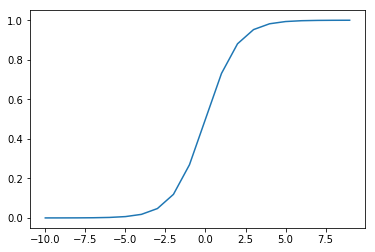

In [2]:
X = numpy.arange(-10,10)
def sigmoid(x):
    return 1/(1+numpy.exp(-x))
matplotlib.pyplot.plot(X, sigmoid(X))

Let's see how well a NN-based regressor learns the free-falling equation $h={1\over2}gt^2$

In [3]:
def generate_data(N):
    g = 8.9
    
    # If using Python's own random number generator
#     Ts = [random.random() for _ in range(N)]
#     Hs = [g*(t**2)/2 for t in Ts]

    # If using Numpy random number generator
    Ts = numpy.random.rand(N)
    Hs = g*(Ts**2)/2
    
    return Ts, Hs

Ts, Hs = generate_data(5000)

In [4]:
def test_NN(Ts, Hs, max_iter=200, alpha=0.001):
    NN = sklearn.neural_network.MLPRegressor(
        hidden_layer_sizes=(4,4,), 
        activation='tanh', 
        random_state = 1, 
        max_iter=max_iter, 
        alpha=alpha
        )
    Ts = Ts.reshape(-1, 1) # learned from error
    NN.fit(Ts, Hs)
#     predictions = NN.predict(Ts)
    return NN
    

In [5]:
x = numpy.linspace(0,1,100)  # testing input 
Ts, Hs = generate_data(5000)
NN = test_NN(Ts, Hs, max_iter=2000, alpha=10)
x = x.reshape(-1, 1)
y = NN.predict(x) # testing output 

Now let's visualize the ground truth function $f$ and the approximation function $\hat{f}$

&lt;matplotlib.legend.Legend at 0x7f868aa2eb70&gt;

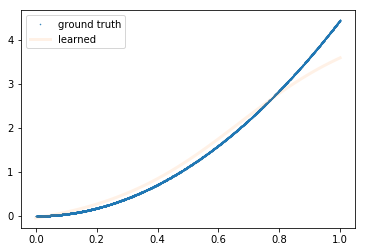

In [8]:
matplotlib.pyplot.plot(Ts, Hs, ".", markersize=1) # visualize the f
matplotlib.pyplot.plot(x,y, linewidth=3, alpha=0.6) # visualize the \hat{f}
matplotlib.pyplot.legend(['ground truth', 'learned'])

Here is another example using polynomial expressions to mimic the sine function. 

In [41]:
X = numpy.linspace(-10,10,20)
SinX = numpy.sin(X)


&lt;matplotlib.legend.Legend at 0x7f9049a7d9b0&gt;

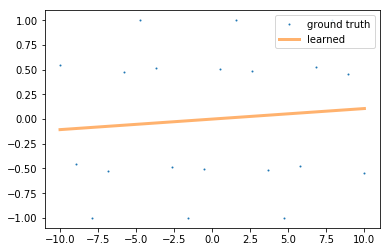

In [87]:
import sklearn.pipeline 
import sklearn.linear_model
import sklearn.preprocessing
PolyReg = sklearn.pipeline.make_pipeline\
            (sklearn.preprocessing.PolynomialFeatures(1),\
             sklearn.linear_model.Ridge(alpha=.5)) 
PolyReg.fit(X.reshape(-1, 1), SinX)
# PolyReg.fit(X, SinX)
matplotlib.pyplot.plot(X, SinX, '.', markersize=2)
x_plot= numpy.linspace(-10, 10, 50)
y_plot=PolyReg.predict(x_plot.reshape(-1,1))
matplotlib.pyplot.plot(x_plot, y_plot, linewidth=3, alpha=0.6)
matplotlib.pyplot.legend(['ground truth', 'learned'])